In [182]:
from matplotlib import pyplot as plt
import pandas as pd

agnostic = False
v = 'v8'
if agnostic:
    v = 'Agnostic/' + v
else :
    v = 'Informed/' + v
df_results_show = pd.read_csv(f'../Output/Evaluation/{v}.csv', delimiter = '|')
df_results_show.sort_values(by = ['Test F1', 'Test Precision', 'Test Accuracy', 'Test AUC'], ascending = False).head(10)

,Epochs,Learning rate,Layers,Channels,Validation AUC,Validation Precision,Validation Accuracy,Validation F1,Test AUC,Test Precision,Test Accuracy,Test F1,Loss,Duration
29,100,0.010,6,16,0.808832,0.720833,0.751185,0.750004,0.891242,0.792373,0.827014,0.826405,48.792155,36.427791
183,200,0.100,2,128,0.806136,0.735683,0.753555,0.753200,0.859415,0.781116,0.810427,0.809910,275957.320886,89.416491
122,150,0.010,4,64,0.757934,0.686567,0.677725,0.677544,0.864019,0.818627,0.808057,0.808004,69.396905,88.804722
86,150,0.100,2,32,0.805620,0.737864,0.732227,0.732190,0.891444,0.820000,0.803318,0.803184,3257.746791,22.728615
182,150,0.100,2,128,0.847690,0.769231,0.748815,0.748454,0.861840,0.791667,0.798578,0.798550,242855.446156,65.073580
11,200,0.001,4,16,0.823095,0.779570,0.746445,0.745552,0.866782,0.828125,0.798578,0.798169,66.640994,46.796024
90,150,0.100,4,32,0.814200,0.722513,0.701422,0.700750,0.900811,0.846154,0.798578,0.797622,396540.845711,52.052110
121,100,0.010,4,64,0.808517,0.747475,0.732227,0.731973,0.873633,0.819588,0.793839,0.793504,62.396264,54.440959
21,100,0.010,2,16,0.811168,0.730769,0.727488,0.727474,0.869792,0.791469,0.791469,0.791469,28.306453,10.463877
26,150,0.010,4,16,0.839941,0.751174,0.753555,0.753549,0.870758,0.783410,0.791469,0.791427,35.335527,36.440776


In [183]:
corr = df_results_show.corr()
corr.style.background_gradient(cmap = 'coolwarm').format(precision = 2)

,Epochs,Learning rate,Layers,Channels,Validation AUC,Validation Precision,Validation Accuracy,Validation F1,Test AUC,Test Precision,Test Accuracy,Test F1,Loss,Duration
Epochs,1.00,-0.00,-0.00,-0.00,0.06,-0.10,0.10,0.13,0.05,-0.14,0.09,0.12,0.10,0.37
Learning rate,-0.00,1.00,-0.00,-0.00,-0.50,-0.33,-0.52,-0.52,-0.48,-0.34,-0.52,-0.51,0.11,-0.01
Layers,-0.00,-0.00,1.00,-0.00,-0.33,-0.17,-0.36,-0.38,-0.35,-0.23,-0.39,-0.40,0.11,0.58
Channels,-0.00,-0.00,-0.00,1.00,-0.06,-0.09,-0.04,-0.04,-0.08,-0.11,-0.05,-0.05,0.12,0.50
Validation AUC,0.06,-0.50,-0.33,-0.06,1.00,0.66,0.94,0.94,0.98,0.70,0.93,0.92,-0.15,-0.18
Validation Precision,-0.10,-0.33,-0.17,-0.09,0.66,1.00,0.69,0.63,0.66,0.95,0.64,0.59,-0.10,-0.16
Validation Accuracy,0.10,-0.52,-0.36,-0.04,0.94,0.69,1.00,0.98,0.93,0.70,0.97,0.95,-0.08,-0.16
Validation F1,0.13,-0.52,-0.38,-0.04,0.94,0.63,0.98,1.00,0.93,0.66,0.96,0.98,-0.06,-0.15
Test AUC,0.05,-0.48,-0.35,-0.08,0.98,0.66,0.93,0.93,1.00,0.74,0.95,0.95,-0.12,-0.19
Test Precision,-0.14,-0.34,-0.23,-0.11,0.70,0.95,0.70,0.66,0.74,1.00,0.71,0.67,-0.09,-0.22


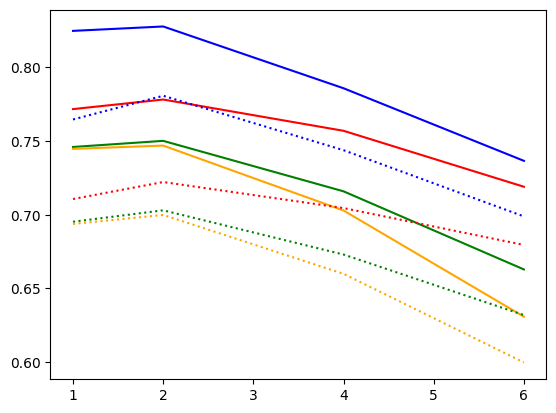

In [184]:
feature = 'Layers'
df_feature = df_results_show.groupby(feature).mean()

parameter = df_feature.index.values
test_auc = df_feature['Test AUC'].values
test_accuracy = df_feature['Test Accuracy'].values
test_precision = df_feature['Test Precision'].values
test_f1 = df_feature['Test F1'].values

val_auc = df_feature['Validation AUC'].values
val_accuracy = df_feature['Validation Accuracy'].values
val_precision = df_feature['Validation Precision'].values
val_f1 = df_feature['Validation F1'].values

plt.plot(parameter, test_precision, color = 'red')
plt.plot(parameter, test_accuracy, color = 'green')
plt.plot(parameter, test_auc, color = 'blue')
plt.plot(parameter, test_f1, color = 'orange')
plt.plot(parameter, val_precision, color = 'red', linestyle = "dotted")
plt.plot(parameter, val_accuracy, color = 'green', linestyle = "dotted")
plt.plot(parameter, val_auc, color = 'blue', linestyle = "dotted")
plt.plot(parameter, val_f1, color = 'orange', linestyle = "dotted")
plt.show()

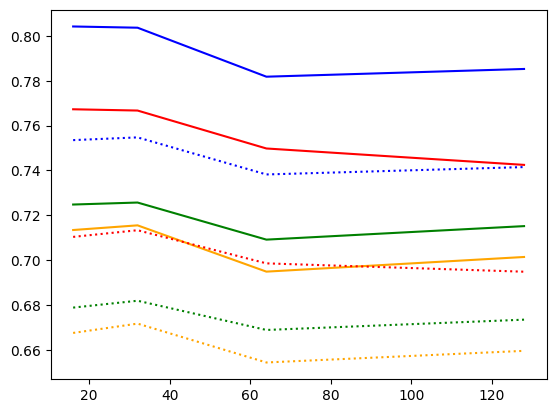

In [185]:
feature = 'Channels'
df_feature = df_results_show.groupby(feature).mean()

parameter = df_feature.index.values
test_auc = df_feature['Test AUC'].values
test_accuracy = df_feature['Test Accuracy'].values
test_precision = df_feature['Test Precision'].values
test_f1 = df_feature['Test F1'].values

val_auc = df_feature['Validation AUC'].values
val_accuracy = df_feature['Validation Accuracy'].values
val_precision = df_feature['Validation Precision'].values
val_f1 = df_feature['Validation F1'].values

plt.plot(parameter, test_precision, color = 'red')
plt.plot(parameter, test_accuracy, color = 'green')
plt.plot(parameter, test_auc, color = 'blue')
plt.plot(parameter, test_f1, color = 'orange')
plt.plot(parameter, val_precision, color = 'red', linestyle = "dotted")
plt.plot(parameter, val_accuracy, color = 'green', linestyle = "dotted")
plt.plot(parameter, val_auc, color = 'blue', linestyle = "dotted")
plt.plot(parameter, val_f1, color = 'orange', linestyle = "dotted")
plt.show()

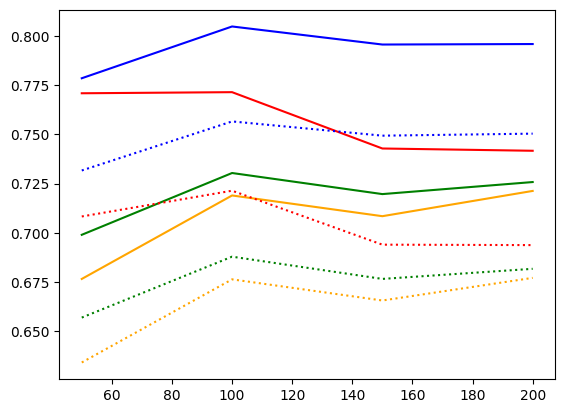

In [186]:
feature = 'Epochs'
df_feature = df_results_show.groupby(feature).mean()

parameter = df_feature.index.values
test_auc = df_feature['Test AUC'].values
test_accuracy = df_feature['Test Accuracy'].values
test_precision = df_feature['Test Precision'].values
test_f1 = df_feature['Test F1'].values

val_auc = df_feature['Validation AUC'].values
val_accuracy = df_feature['Validation Accuracy'].values
val_precision = df_feature['Validation Precision'].values
val_f1 = df_feature['Validation F1'].values

plt.plot(parameter, test_precision, color = 'red')
plt.plot(parameter, test_accuracy, color = 'green')
plt.plot(parameter, test_auc, color = 'blue')
plt.plot(parameter, test_f1, color = 'orange')
plt.plot(parameter, val_precision, color = 'red', linestyle = "dotted")
plt.plot(parameter, val_accuracy, color = 'green', linestyle = "dotted")
plt.plot(parameter, val_auc, color = 'blue', linestyle = "dotted")
plt.plot(parameter, val_f1, color = 'orange', linestyle = "dotted")
plt.show()

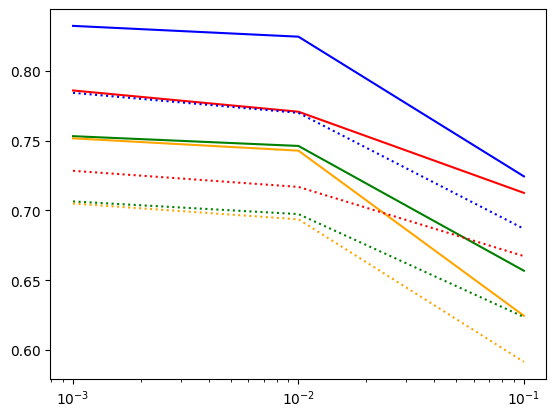

In [187]:
feature = 'Learning rate'
df_feature = df_results_show.groupby(feature).mean()

parameter = df_feature.index.values
test_auc = df_feature['Test AUC'].values
test_accuracy = df_feature['Test Accuracy'].values
test_precision = df_feature['Test Precision'].values
test_f1 = df_feature['Test F1'].values

val_auc = df_feature['Validation AUC'].values
val_accuracy = df_feature['Validation Accuracy'].values
val_precision = df_feature['Validation Precision'].values
val_f1 = df_feature['Validation F1'].values

plt.plot(parameter, test_precision, color = 'red')
plt.plot(parameter, test_accuracy, color = 'green')
plt.plot(parameter, test_auc, color = 'blue')
plt.plot(parameter, test_f1, color = 'orange')
plt.plot(parameter, val_precision, color = 'red', linestyle = "dotted")
plt.plot(parameter, val_accuracy, color = 'green', linestyle = "dotted")
plt.plot(parameter, val_auc, color = 'blue', linestyle = "dotted")
plt.plot(parameter, val_f1, color = 'orange', linestyle = "dotted")
plt.xscale("log")
plt.show()

In [188]:
agnostic = False
versions = ['v6', 'v7', 'v8']
if agnostic:
    a = 'Agnostic/'
else :
    a = 'Informed/'
df_results_all = pd.DataFrame()
for version in versions:
    df_results_model = pd.read_csv(f'../Output/Evaluation/{a+version}.csv', delimiter = '|')
    df_results_model['model'] = [version for i in range(len(df_results_model))]
    df_results_all = pd.concat([df_results_all, df_results_model])
df_results_all_sorted = df_results_all.sort_values(by = ['Test F1', 'Test Precision', 'Test Accuracy', 'Test AUC'], ascending = False).reset_index(drop=False)
df_results_all_sorted.head(50)

,index,Epochs,Learning rate,Layers,Channels,Validation AUC,Validation Precision,Validation Accuracy,Validation F1,Test AUC,Test Precision,Test Accuracy,Test F1,Loss,Duration,model
0,29,100,0.010,6,16,0.808832,0.720833,0.751185,0.750004,0.891242,0.792373,0.827014,0.826405,48.792155,36.427791,v8
1,183,200,0.100,2,128,0.806136,0.735683,0.753555,0.753200,0.859415,0.781116,0.810427,0.809910,275957.320886,89.416491,v8
2,122,150,0.010,4,64,0.757934,0.686567,0.677725,0.677544,0.864019,0.818627,0.808057,0.808004,69.396905,88.804722,v8
3,86,150,0.100,2,32,0.805620,0.737864,0.732227,0.732190,0.891444,0.820000,0.803318,0.803184,3257.746791,22.728615,v8
4,182,150,0.100,2,128,0.847690,0.769231,0.748815,0.748454,0.861840,0.791667,0.798578,0.798550,242855.446156,65.073580,v8
5,11,200,0.001,4,16,0.823095,0.779570,0.746445,0.745552,0.866782,0.828125,0.798578,0.798169,66.640994,46.796024,v8
6,90,150,0.100,4,32,0.814200,0.722513,0.701422,0.700750,0.900811,0.846154,0.798578,0.797622,396540.845711,52.052110,v8
7,121,100,0.010,4,64,0.808517,0.747475,0.732227,0.731973,0.873633,0.819588,0.793839,0.793504,62.396264,54.440959,v8
8,21,100,0.010,2,16,0.811168,0.730769,0.727488,0.727474,0.869792,0.791469,0.791469,0.791469,28.306453,10.463877,v8
9,26,150,0.010,4,16,0.839941,0.751174,0.753555,0.753549,0.870758,0.783410,0.791469,0.791427,35.335527,36.440776,v8


In [189]:
df_results_all_sorted[(df_results_all_sorted['Epochs'] == 100) & (df_results_all_sorted['Layers'] == 2) & (df_results_all_sorted['Learning rate'] == 0.001) & (df_results_all_sorted['Channels'] == 16)].head()

,index,Epochs,Learning rate,Layers,Channels,Validation AUC,Validation Precision,Validation Accuracy,Validation F1,Test AUC,Test Precision,Test Accuracy,Test F1,Loss,Duration,model
13,5,100,0.001,2,16,0.817592,0.747423,0.727488,0.727045,0.854136,0.818653,0.791469,0.791089,47.221791,10.646132,v8
370,5,100,0.001,2,16,0.720671,0.697674,0.661137,0.658218,0.761461,0.725146,0.682464,0.679586,47.352590,7.076547,v7
429,5,100,0.001,2,16,0.740033,0.744966,0.672986,0.665771,0.757058,0.751724,0.672986,0.664786,54.780866,11.919227,v6
